<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/Ejer1-3_dos-varLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Logistic Regression

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

### Lectura de datos


In [13]:
# Load data
df = pd.read_csv("https://drive.google.com/uc?id=1lHVyj6hKEnbZukPPKWjnF0zwAul0-cGR")
data.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Compute the Cost Function $J(\theta)$ and Gradient

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

### Gradient Descent

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

#Formamos las matrices

In [25]:
rows = df.shape[0]
cols = df.shape[1]
scores = df[['DMV_Test_1', 'DMV_Test_2']].values
results = df['Results'].values

mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores

X = np.append(np.ones((rows, 1)), scores, axis=1) #include intercept
y = results.reshape(rows, 1)
print(X.shape)
print(y.shape)


(100, 3)
(100, 1)


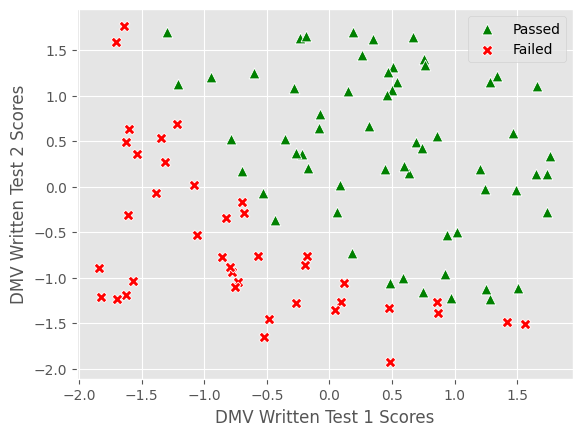

In [43]:
passed = (results == 1).reshape(100, 1)
failed = (results == 0).reshape(100, 1)

ax = sns.scatterplot(x = scores[passed[:, 0], 0],  y = scores[passed[:, 0], 1], marker = "^", color = "green",  s = 60)
sns.scatterplot(x = scores[failed[:, 0], 0], y = scores[failed[:, 0], 1], marker = "X", color = "red",   s = 60)
ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")
ax.legend(["Passed", "Failed"])
plt.show();

In [27]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

In [28]:
def hypotesis(x,theta):
    z = np.dot(x, theta)
    h = sigmoid(z)
    return h

In [29]:
def gradiente(x,y,theta,alfa,iteraciones,epsilon):
  import  math
  m=len(y)
  J_vals = []
  prev = math.inf
  for i in range(iteraciones):
      h = hypotesis(X, theta)
      cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
      J_vals.append(cost)
      if(abs( J_vals[i]- prev) < epsilon) :
             print("Convergencia Alcanzada !", i ," iteraciones")
             break
      prev = J_vals[i]
      gradient = np.dot(X.T, (h - y)) / m
      theta -= alpha * gradient
    #if i % 20000 == 0:
    #   print('iteracion ',i,'coste ', cost)
  print('Adjusted coefficient: {}'.format(theta))
  print("cost: {}".format(J_vals[i]))
  return theta, J_vals

In [30]:
theta = np.zeros((cols , 1))
print(theta)

[[0.]
 [0.]
 [0.]]


In [31]:
alpha=0.001
iteraciones = 1000000
epsilon = 1e-8
theta, costs = gradiente(X, y, theta, alpha, iteraciones,epsilon)

Convergencia Alcanzada ! 246955  iteraciones
Adjusted coefficient: [[1.56243475]
 [3.66096269]
 [3.4041362 ]]
cost: 0.2042391664100852


Plot $J(\theta)$

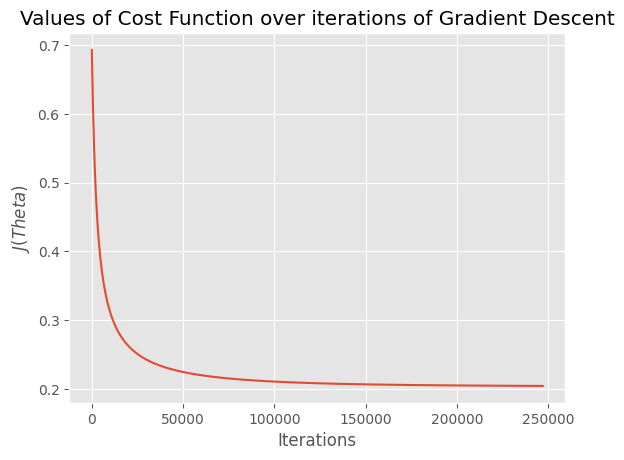

In [32]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(Theta)$")
plt.title("Values of Cost Function over iterations of Gradient Descent");

### Plotting the decision boundary

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

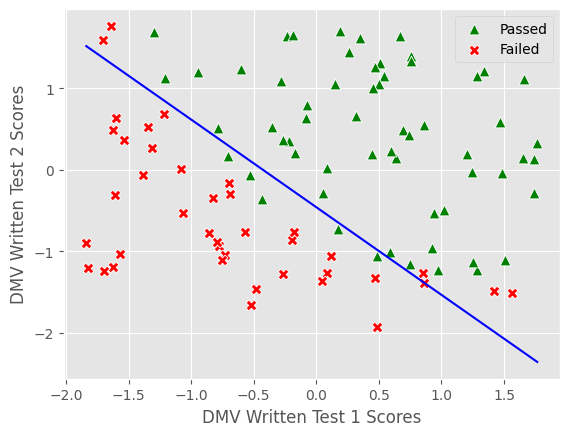

In [42]:
sns.scatterplot(x = X[passed[:, 0], 1], y = X[passed[:, 0], 2],  marker = "^",  color = "green",  s = 60)
ax = sns.scatterplot(x = X[failed[:, 0], 1], y = X[failed[:, 0], 2],  marker = "X",  color = "red",   s = 60)
ax.legend(["Passed", "Failed"])
ax.set(xlabel="DMV Written Test 1 Scores", ylabel="DMV Written Test 2 Scores")
x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]
sns.lineplot(x = x_boundary, y = y_boundary, color="blue")
plt.show();

### Regresión Logistica, Sklearn



In [36]:
from sklearn.linear_model import LogisticRegression
# instantiate a logistic regression model, and fit with X and y

x1 = df[['DMV_Test_1', 'DMV_Test_2']].values
y1 = df['Results'].values


x1 =( x1-x1.mean())/x1.std()

model = LogisticRegression(C=10)
model = model.fit(x1, y1)

# check the accuracy on the training set
model.score(x1, y1)
print("coef",model.coef_)
print("intercept\n",model.intercept_)

# predict_proba will return array containing proability of y = 0 and y = 1
print( "\n",model.predict_proba(x1)[0:3,])
# predict will give convert the probability(y=1) values > .5 to 1 else 0
print (model.predict(x1[0:3,]))

coef [[3.45226733 3.35746089]]
intercept
 [1.52373113]

 [[8.85050773e-01 1.14949227e-01]
 [9.99861504e-01 1.38495589e-04]
 [9.38568239e-01 6.14317609e-02]]
[0 0 0]


In [40]:
from sklearn import metrics

# generate evaluation metrics
print ("Accuracy :", metrics.accuracy_score(y1, model.predict(x1)))
##print ("AUC :", metrics.roc_auc_score(y1, model.predict_proba(x1[0:3,])))

print ("Confusion matrix :",metrics.confusion_matrix(y1, model.predict(x1)))
print ("classification report :", metrics.classification_report(y1, model.predict(x1)))

Accuracy : 0.89
Confusion matrix : [[34  6]
 [ 5 55]]
classification report :               precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100

